## 1. Basic Setup and Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import torch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import seaborn as sns
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

## 2. Understanding LSH with MinHash

### REad this article: [https://www.pinecone.io/learn/series/faiss/locality-sensitive-hashing/](https://www.pinecone.io/learn/series/faiss/locality-sensitive-hashing/)

In [28]:
# First, let's implement a simple version of MinHash for document similarity

def create_shingles(text, k=2):
    """Create k-shingles (k-grams) from text"""
    shingles = set()
    ...
    return shingles

# Create example documents
documents = [
    "The quick brown fox jumps over the lazy dog",
    "The quick brown dog jumps over the lazy fox",
    "The lazy fox jumps over the quick brown dog",
    "A completely different sentence with no similarity"
]

# Display the shingles for the first document
shingles = create_shingles(documents[0], k=3)
print(f"Three-character shingles for '{documents[0]}':")
print(shingles)

Three-character shingles for 'The quick brown fox jumps over the lazy dog':
{'er ', 'ps ', 'uic', 'he ', ' qu', ' ju', ' ov', 'fox', 'The', 'k b', 'wn ', 'ump', 'e q', 'ove', 'bro', 'x j', ' la', 'ver', 'y d', 'row', 'the', 'r t', 'own', ' do', 's o', 'e l', ' br', 'ox ', 'jum', 'ck ', ' fo', 'mps', ' th', 'laz', 'azy', 'qui', 'n f', 'ick', 'zy ', 'dog'}


Jaccard similarity matrix:
[[1.         0.81818182 0.9047619  0.01162791]
 [0.81818182 1.         0.9047619  0.        ]
 [0.9047619  0.9047619  1.         0.        ]
 [0.01162791 0.         0.         1.        ]]


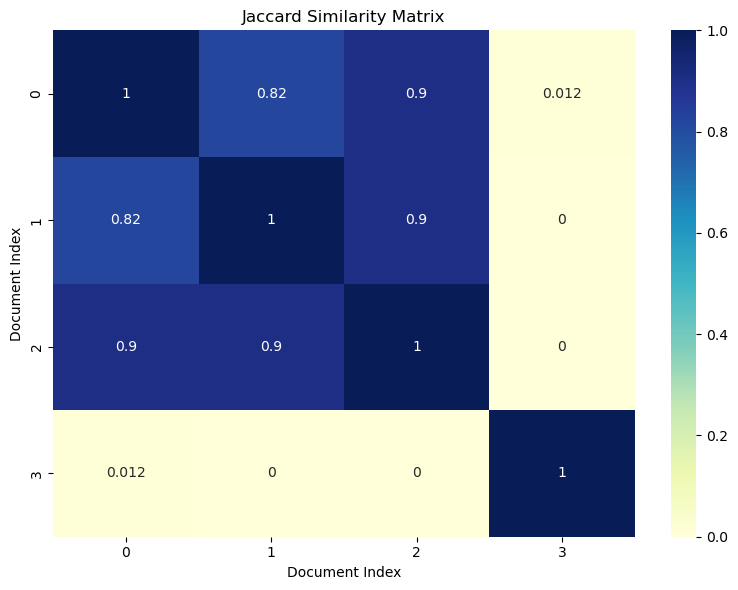

In [29]:
# Create shingle sets for all documents
shingle_sets = [create_shingles(doc, k=3) for doc in documents]

# Compute Jaccard similarity between all pairs of documents
def jaccard_similarity(set1, set2):
    """Compute Jaccard similarity between two sets"""
    ...

# Calculate and display the Jaccard similarity matrix
similarity_matrix = np.zeros((len(documents), len(documents)))
for i in range(len(documents)):
    for j in range(len(documents)):
        similarity_matrix[i, j] = jaccard_similarity(shingle_sets[i], shingle_sets[j])

print("Jaccard similarity matrix:")
print(similarity_matrix)

# Visualize the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=range(len(documents)), yticklabels=range(len(documents)))
plt.title("Jaccard Similarity Matrix")
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.tight_layout()
plt.show()

## 3. Implementing MinHash

In [30]:
# Implementing MinHash for efficiently estimating Jaccard similarity

def get_universe_set(shingle_sets):
    """Get the universe of all shingles"""
    ...
    return universe

# Get all unique shingles
all_shingles = get_universe_set(shingle_sets)
print(f"Total unique shingles: {len(all_shingles)}")

# Create shingle to index mapping
shingle_to_idx = {shingle: i for i, shingle in enumerate(all_shingles)}

# Create document-shingle matrix (1 if document contains shingle, 0 otherwise)
doc_shingle_matrix = np.zeros((len(documents), len(all_shingles)), dtype=np.int8)
for i, shingle_set in enumerate(shingle_sets):
    for ... in ...:
        ...

print("Document-shingle matrix shape:", doc_shingle_matrix.shape)
print("First few columns of the document-shingle matrix:")
print(doc_shingle_matrix[:, :5])

Total unique shingles: 90
Document-shingle matrix shape: (4, 90)
First few columns of the document-shingle matrix:
[[0 1 0 1 0]
 [1 1 1 1 0]
 [1 1 0 1 0]
 [0 0 0 0 1]]


In [31]:
# Implement MinHash
def minhash_signatures(doc_shingle_matrix, num_permutations=100):
    """Generate MinHash signatures for documents using permutations"""
    num_docs, num_shingles = ...
    
    # Initialize signature matrix with infinity
    signatures = ...
    
    # Generate random permutations
    permutations = [np.random.... for _ in range(num_permutations)]
    
    # For each permutation
    for i, permutation in enumerate(permutations):
        # For each shingle position in the permutation
        for ... , ... in enumerate(permutation):
            # For each document
            for ... in range(num_docs):
                # If document has this shingle
                if doc_shingle_matrix[doc_idx, shingle_idx] == 1:
                    # Update signature with the minimum position
                    signatures[i, doc_idx] = ...
    
    return signatures

In [32]:
# Generate MinHash signatures
num_permutations = 50
start_time = time.time()
signatures = minhash_signatures(doc_shingle_matrix, num_permutations=num_permutations)
print(f"MinHash computation time: {time.time() - start_time:.4f} seconds")

print("MinHash signature matrix shape:", signatures.shape)
print("First few rows of the signature matrix:")
print(signatures[:5, :])

MinHash computation time: 0.0508 seconds
MinHash signature matrix shape: (50, 4)
First few rows of the signature matrix:
[[0. 0. 0. 1.]
 [1. 0. 1. 3.]
 [0. 0. 0. 9.]
 [0. 0. 0. 3.]
 [1. 1. 1. 0.]]


Estimated Jaccard similarity matrix from MinHash:
[[1.   0.86 0.92 0.02]
 [0.86 1.   0.94 0.  ]
 [0.92 0.94 1.   0.  ]
 [0.02 0.   0.   1.  ]]


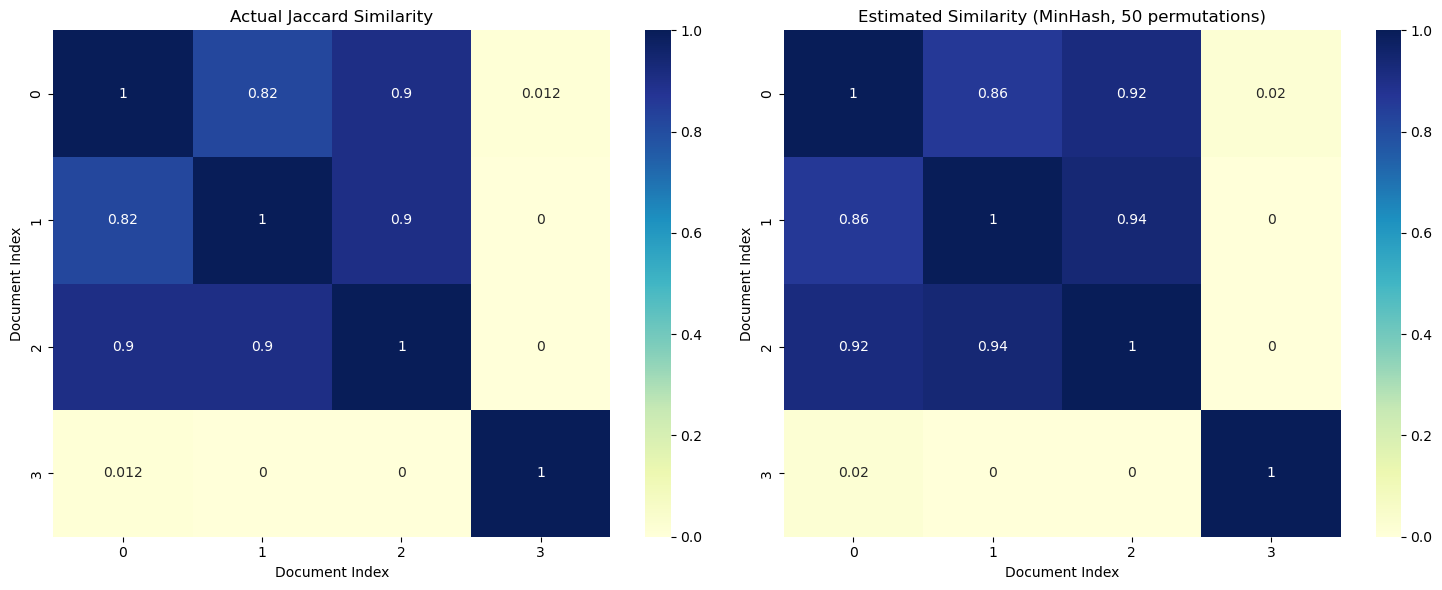

In [33]:
# Estimate Jaccard similarity using MinHash signatures
def estimate_jaccard_from_minhash(signatures, doc1_idx, doc2_idx):
    """Estimate Jaccard similarity from MinHash signatures"""
    # Count the number of hash functions where signatures match
    matches = np.sum(...)
    # Divide by the total number of hash functions
    return matches / signatures.shape[0]

# Compare the estimated similarity with the actual Jaccard similarity
estimated_similarity_matrix = np.zeros((len(documents), len(documents)))
for i in range(len(documents)):
    for j in range(len(documents)):
        estimated_similarity_matrix[i, j] = estimate_jaccard_from_minhash(signatures, i, j)

print("Estimated Jaccard similarity matrix from MinHash:")
print(estimated_similarity_matrix)

# Visualize and compare the actual vs. estimated similarity
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=range(len(documents)), yticklabels=range(len(documents)), ax=axes[0])
axes[0].set_title("Actual Jaccard Similarity")
axes[0].set_xlabel("Document Index")
axes[0].set_ylabel("Document Index")

sns.heatmap(estimated_similarity_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=range(len(documents)), yticklabels=range(len(documents)), ax=axes[1])
axes[1].set_title(f"Estimated Similarity (MinHash, {num_permutations} permutations)")
axes[1].set_xlabel("Document Index")
axes[1].set_ylabel("Document Index")

plt.tight_layout()
plt.show()

## 4. Implementing LSH for Binary Data with Text Documents

Using device: cpu
Loading model: sentence-transformers/all-MiniLM-L6-v2
Total number of documents: 15
Vocabulary size: 87
Binary vectors shape: (15, 87)
Average density: 0.0881


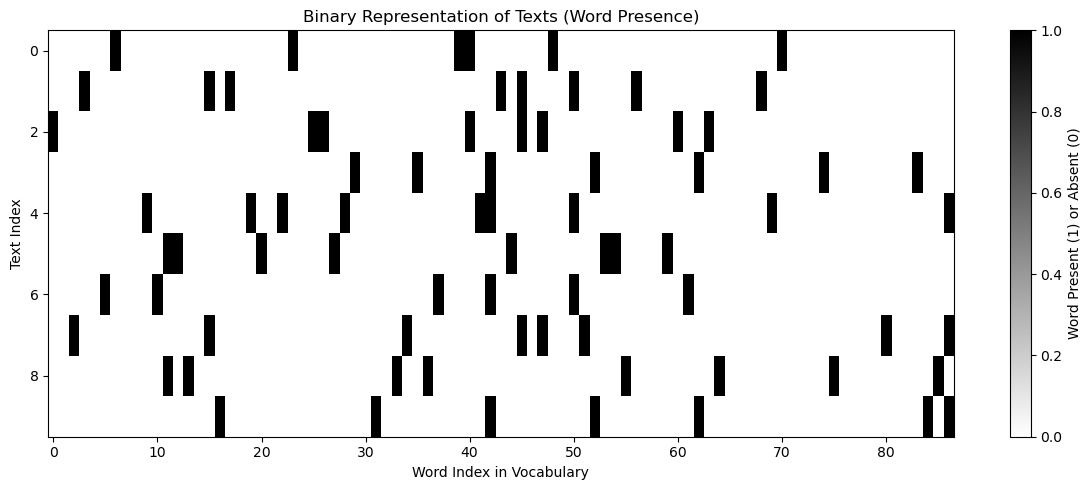

Sample words from vocabulary: ['a', 'agents', 'algorithms', 'amounts', 'another', 'are', 'artificial', 'at', 'attention', 'augmented', 'becoming', 'can', 'complex', 'computer', 'convolutional']


In [3]:
# Let's create a simple binary representation of text data
# We'll use the texts from Part 8, but process them earlier to demonstrate binary LSH
import torch
from transformers import AutoTokenizer, AutoModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Use the same model as in previous labs
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir="/tmp/")

print(f"Using device: {device}")
print(f"Loading model: {model_name}")

# Sample texts for our experiment
texts = [
    "Artificial intelligence is revolutionizing many fields.",
    "Deep learning models require large amounts of data.",
    "PyTorch is a popular framework for machine learning.",
    "Transformers have improved natural language processing significantly.",
    "Retrieval augmented generation enhances language models with external knowledge.",
    "Neural networks can learn complex patterns from examples.",
    "Language models are becoming increasingly powerful.",
    "Machine learning algorithms improve with more training data.",
    "Computer vision systems can recognize objects in images.",
    "Natural language processing deals with human language understanding.",
    "Reinforcement learning trains agents through reward signals.",
    "Transfer learning leverages knowledge from one task to another.",
    "Convolutional neural networks excel at image processing tasks.",
    "Recurrent neural networks are designed for sequential data.",
    "Attention mechanisms help models focus on relevant information.",
]

print(f"Total number of documents: {len(texts)}")

# Convert texts to binary vectors using a simple approach: presence of common words
# We'll create a vocabulary of words and represent each text as a binary vector of word presence

# Tokenize and clean texts
def simple_tokenize(text):
    """Convert text to lowercase, remove punctuation, and split into words"""
    # Remove punctuation and convert to lowercase
    cleaned = ''.join(c.lower() if c.isalnum() or c.isspace() else ' ' for c in text)
    return cleaned.split()

# Tokenize all texts
tokenized_texts = [simple_tokenize(text) for text in texts]

# Create vocabulary - all unique words
all_words = set()
for tokens in tokenized_texts:
    all_words.update(tokens)

# Sort vocabulary for consistency
vocabulary = sorted(list(all_words))
print(f"Vocabulary size: {len(vocabulary)}")

# Create word-to-index mapping
word_to_idx = {word: i for i, word in enumerate(vocabulary)}

# Create binary vectors for each text (1 if word is present, 0 otherwise)
binary_vectors = np.zeros((len(texts), len(vocabulary)), dtype=np.int8)
for i, tokens in enumerate(tokenized_texts):
    for word in tokens:
        binary_vectors[i, word_to_idx[word]] = 1

print(f"Binary vectors shape: {binary_vectors.shape}")
print(f"Average density: {np.mean(binary_vectors):.4f}")

# Visualize a few binary vectors
plt.figure(figsize=(12, 5))
plt.imshow(binary_vectors[:10], cmap='binary', aspect='auto')
plt.title("Binary Representation of Texts (Word Presence)")
plt.xlabel("Word Index in Vocabulary")
plt.ylabel("Text Index")
plt.colorbar(label="Word Present (1) or Absent (0)")
plt.tight_layout()
plt.show()

# Print a sample of words from the vocabulary
sample_words = vocabulary[:15]
print(f"Sample words from vocabulary: {sample_words}")

In [35]:
# Implement LSH for binary data using bit sampling
class LSH:
    def __init__(self, num_bits=16, num_tables=4):
        """
        Initialize LSH with bit sampling
        
        Parameters:
        - num_bits: Number of bits to sample for each hash
        - num_tables: Number of hash tables to use
        """
        self.num_bits = num_bits
        self.num_tables = num_tables
        self.hash_tables = [defaultdict(list) for _ in range(num_tables)]
        self.hash_functions = None
        
    def _generate_hash_functions(self, dim):
        """Generate random bit sampling hash functions"""
        # For each table, randomly select bit positions to sample
        self.hash_functions = [np.random.choice(..., ..., replace=...) 
                              for _ in range(self.num_tables)]
        
    def fit(self, data):
        """Fit the LSH model to the data"""
        num_samples, dim = data.shape
        
        # Generate hash functions if not already generated
        if self.hash_functions is None:
            self._generate_hash_functions(dim)
        
        # For each table
        for table_idx in range(self.num_tables):
            # Get the bit positions for this table
            bit_positions = ...
            
            # For each data point
            for i in range(num_samples):
                # Extract the bits at the selected positions
                bits = ...
                
                # Convert bits to a hash value (as a tuple for hashability)
                hash_value = ...
                
                # Add data point to the hash table
                ....append(i)
    
    def query(self, query_vector, k=10):
        """Find k nearest neighbors for the query vector"""
        # Set to keep track of candidates
        candidates = set()
        
        # For each table
        for table_idx in range(self.num_tables):
            # Get the bit positions for this table
            bit_positions = ...
            
            # Extract the bits at the selected positions
            bits = ...
            
            # Convert bits to a hash value
            hash_value = ...
            
            # Add data points in the same bucket to candidates
            candidates.update(...)
        
        return list(candidates)

In [36]:
# Test LSH on our text binary vectors
lsh = LSH(num_bits=10, num_tables=6)
lsh.fit(binary_vectors)

# Define some queries to test with
queries = [
    "Deep learning and neural networks",
    "Computer vision and image processing",
    "Natural language understanding"
]

print("Processing queries...")
for query_text in queries:
    print(f"\nQuery: '{query_text}'")
    
    # Convert query to binary vector
    query_tokens = simple_tokenize(query_text)
    query_vector = np.zeros(len(vocabulary), dtype=np.int8)
    for word in query_tokens:
        if word in word_to_idx:  # Only use words in our vocabulary
            query_vector[word_to_idx[word]] = 1
    
    # Find similar documents using LSH
    start_time = time.time()
    lsh_candidates = lsh.query(query_vector, k=5)
    lsh_time = time.time() - start_time
    
    # Compute actual Hamming distances (simple Jaccard similarity for binary vectors)
    hamming_distances = np.zeros(len(texts))
    for i in range(len(texts)):
        # Hamming distance: count of positions where bits differ
        hamming_distances[i] = np.sum(query_vector != binary_vectors[i])
    
    # Get indices of the k nearest neighbors
    k = 3
    actual_nn_indices = np.argsort(hamming_distances)[:k]
    
    # Compute exact search time
    start_time = time.time()
    _ = np.argsort(hamming_distances)[:k]
    linear_time = time.time() - start_time
    
    print(f"LSH query time: {lsh_time:.6f} seconds")
    print(f"Linear search time: {linear_time:.6f} seconds")
    print(f"Speedup factor: {linear_time / lsh_time:.2f}x")
    
    print("\nLSH candidates:")
    for i, idx in enumerate(lsh_candidates[:k]):
        print(f"  {i+1}. {texts[idx][:50]}... (Distance: {hamming_distances[idx]})")
    
    print("\nActual top results:")
    for i, idx in enumerate(actual_nn_indices):
        print(f"  {i+1}. {texts[idx][:50]}... (Distance: {hamming_distances[idx]})")
    
    # Check recall
    recall = np.isin(actual_nn_indices, lsh_candidates).sum() / k
    print(f"\nRecall: {recall:.2f} ({np.isin(actual_nn_indices, lsh_candidates).sum()}/{k} top matches found)")

# Visualize the LSH buckets for our binary text representations
table_idx = 0
hash_table = lsh.hash_tables[table_idx]

print(f"\nNumber of buckets in hash table {table_idx}: {len(hash_table)}")

# Find texts that hash to the same bucket
print("\nTexts in the same bucket (sample):")
bucket_counts = [len(indices) for indices in hash_table.values()]
print(f"Average bucket size: {np.mean(bucket_counts):.2f}")
print(f"Max bucket size: {np.max(bucket_counts)}")

# Show a sample of buckets with multiple texts
bucket_sample = [bucket for bucket, indices in hash_table.items() if len(indices) > 1][:3]
for bucket in bucket_sample:
    text_indices = hash_table[bucket]
    print(f"\nBucket {bucket} contains {len(text_indices)} texts:")
    for idx in text_indices:
        print(f"  - {texts[idx]}")

Processing queries...

Query: 'Deep learning and neural networks'
LSH query time: 0.000063 seconds
Linear search time: 0.000009 seconds
Speedup factor: 0.14x

LSH candidates:
  1. Artificial intelligence is revolutionizing many fi... (Distance: 10.0)
  2. Deep learning models require large amounts of data... (Distance: 8.0)
  3. PyTorch is a popular framework for machine learnin... (Distance: 10.0)

Actual top results:
  1. Deep learning models require large amounts of data... (Distance: 8.0)
  2. Neural networks can learn complex patterns from ex... (Distance: 8.0)
  3. Convolutional neural networks excel at image proce... (Distance: 8.0)

Recall: 1.00 (3/3 top matches found)

Query: 'Computer vision and image processing'
LSH query time: 0.000053 seconds
Linear search time: 0.000046 seconds
Speedup factor: 0.88x

LSH candidates:
  1. Artificial intelligence is revolutionizing many fi... (Distance: 10.0)
  2. Deep learning models require large amounts of data... (Distance: 12.0)
  3. P

## 5. LSH with Real-Valued Data - Reference Implementation

In [37]:
# Implement LSH for real-valued data using random projections
class LSH_RealValued:
    def __init__(self, hash_size=10, num_tables=4, projection_width=4.0):
        """
        Initialize LSH for real-valued data
        
        Parameters:
        - hash_size: Number of random projections per hash
        - num_tables: Number of hash tables
        - projection_width: Width of the projection buckets (w)
        """
        self.hash_size = hash_size
        self.num_tables = num_tables
        self.projection_width = projection_width
        self.hash_tables = [defaultdict(list) for _ in range(num_tables)]
        self.random_projections = None
        self.random_offsets = None
        
    def _generate_hash_functions(self, dim):
        """Generate random projections for LSH"""
        # Random projection vectors - one for each hash bit in each table
        self.random_projections = [
            np.random.normal(0, 1, (self.hash_size, dim)) 
            for _ in range(self.num_tables)
        ]
        
        # Random offsets in [0, w) for each hash bit in each table
        self.random_offsets = [
            np.random.uniform(0, self.projection_width, self.hash_size) 
            for _ in range(self.num_tables)
        ]
        
    def _hash_vector(self, vector, table_idx):
        """Hash a vector using random projections"""
        # Get projections and offsets for this table
        projections = self.random_projections[table_idx]
        offsets = self.random_offsets[table_idx]
        
        # Compute projections and quantize
        # h(v) = floor((a·v + b) / w)
        dot_products = ...
        hash_values = ....astype(int)
        
        # Convert to tuple for hashability
        return tuple(hash_values)
        
    def fit(self, data):
        """Fit the LSH model to the data"""
        num_samples, dim = data.shape
        
        # Generate hash functions if not already generated
        if self.random_projections is None:
            self._generate_hash_functions(dim)
        
        # For each table
        for table_idx in range(self.num_tables):
            # For each data point
            for i in range(num_samples):
                # Hash the vector
                hash_value = ...
                
                # Add data point to the hash table
                ....append(i)
    
    def query(self, query_vector, k=10, max_candidates=100):
        """Find k nearest neighbors for the query vector"""
        # Set to keep track of candidates
        candidates = set()
        
        # For each table
        for table_idx in range(self.num_tables):
            # Hash the query vector
            hash_value = ...
            
            # Add data points in the same bucket to candidates
            candidates.update(...)
            
            # Early stopping if we have enough candidates
            if len(candidates) >= max_candidates:
                break
        
        return list(candidates)

## 6. LSH for Similar Image Search

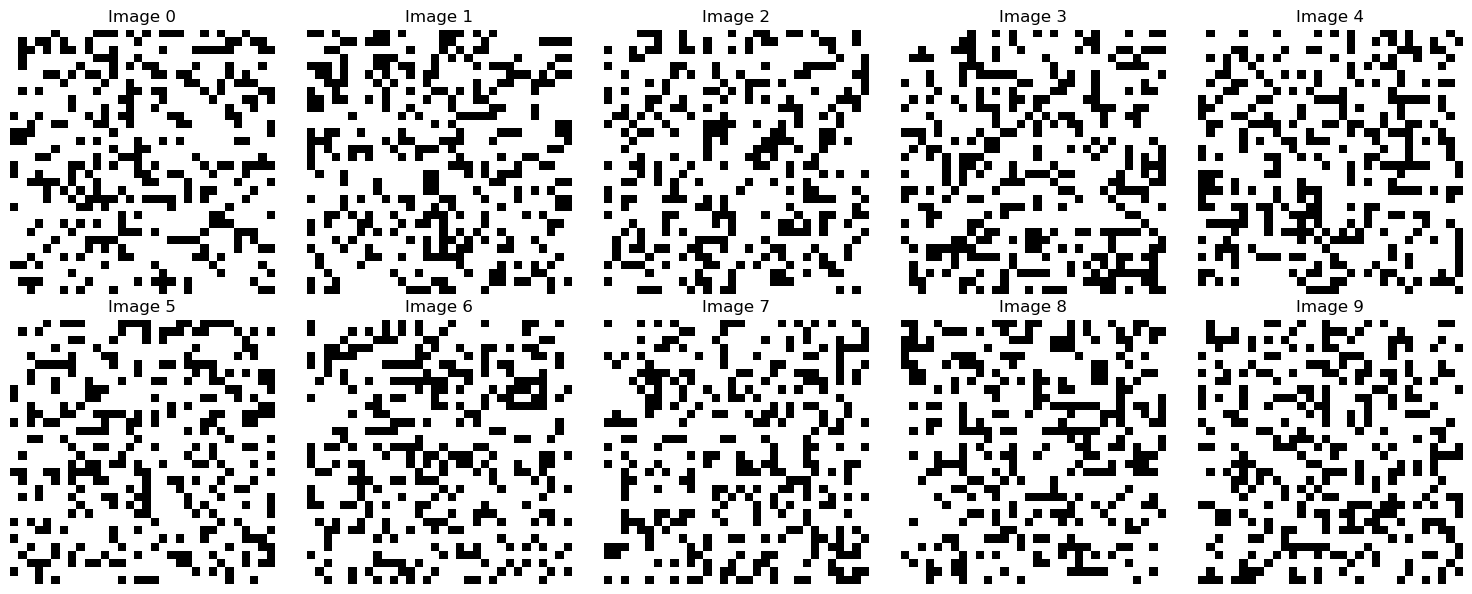

In [38]:
# Apply LSH to a simple image similarity search task
# We'll use a small subset of random images as an example

def generate_random_images(num_images=100, height=32, width=32):
    """Generate random binary images (0s and 1s)"""
    # Generate random binary images
    images = np.random.binomial(1, 0.3, (num_images, height, width))
    return images

# Generate random binary images
num_images = 200
height, width = 32, 32
images = generate_random_images(num_images, height, width)

# Flatten images for LSH
flattened_images = images.reshape(num_images, height * width)

# Show a few sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(images[i], cmap='binary')
    axes[i].set_title(f"Image {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

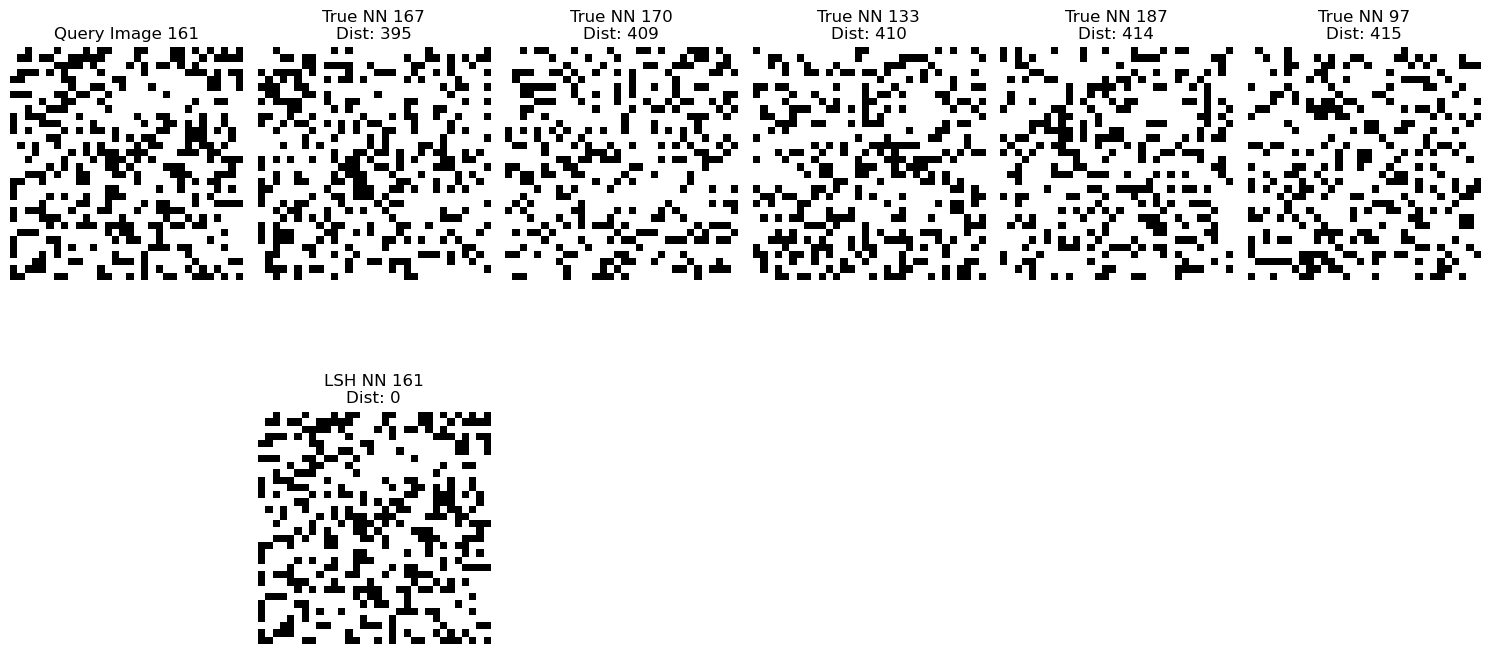

In [39]:
# Apply LSH to image data
lsh_images = LSH(num_bits=16, num_tables=8)
lsh_images.fit(flattened_images)

# Choose a random query image
query_idx = np.random.randint(0, num_images)
query_image = flattened_images[query_idx]

# Find similar images using LSH
lsh_candidates = lsh_images.query(query_image, k=5)

# Compute actual Hamming distances to all images
hamming_distances = np.sum(query_image != flattened_images, axis=1)
# Get indices of the k nearest neighbors
k = 5
actual_nn_indices = np.argsort(hamming_distances)[1:k+1]  # Exclude self

# Display the query image and its nearest neighbors
plt.figure(figsize=(15, 8))

# Display query image
plt.subplot(2, k+1, 1)
plt.imshow(images[query_idx], cmap='binary')
plt.title(f"Query Image {query_idx}")
plt.axis('off')

# Display true nearest neighbors
for i, idx in enumerate(actual_nn_indices):
    plt.subplot(2, k+1, i+2)
    plt.imshow(images[idx], cmap='binary')
    plt.title(f"True NN {idx}\nDist: {hamming_distances[idx]}")
    plt.axis('off')

# Display LSH nearest neighbors
for i, idx in enumerate(lsh_candidates[:k]):
    plt.subplot(2, k+1, k+3+i)
    plt.imshow(images[idx], cmap='binary')
    plt.title(f"LSH NN {idx}\nDist: {hamming_distances[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Analyzing LSH Performance

In [40]:
# Analyze LSH performance trade-offs
# We'll evaluate how the number of hash tables and bits affect accuracy and speed

# Parameters to test
bits_to_test = [4, 8, 12, 16]
tables_to_test = [1, 2, 4, 8, 16]

# Set up experiment
recall_results = np.zeros((len(bits_to_test), len(tables_to_test)))
query_times = np.zeros((len(bits_to_test), len(tables_to_test)))

# We'll use the binary image data from section 6 for our experiments

# Number of queries to average over
num_queries = 20
k = 10  # top-k neighbors to find

# Run experiments with binary data
for i, num_bits in enumerate(bits_to_test):
    for j, num_tables in enumerate(tables_to_test):
        print(f"Testing {num_bits} bits, {num_tables} tables...")
        
        # Initialize and fit LSH with binary data
        lsh_test = ...(num_bits=num_bits, num_tables=num_tables)
        # Use flattened_images from section 6 for testing
        lsh_test....(flattened_images)
        
        # Track total recall and query time
        total_recall = 0
        total_query_time = 0
        
        # Run multiple queries
        for _ in range(num_queries):
            # Pick a random query point
            query_idx = np.random.randint(0, len(flattened_images))
            query_vector = flattened_images[query_idx]
            
            # Measure LSH query time
            start_time = time.time()
            lsh_candidates = ...
            lsh_time = time.time() - start_time
            total_query_time += lsh_time
            
            # Find actual nearest neighbors using Hamming distance
            hamming_distances = np.sum(query_vector != flattened_images, axis=1)
            actual_nn_indices = np.argsort(hamming_distances)[1:k+1]  # Exclude self
            
            # Calculate recall
            recall = np.isin(actual_nn_indices, lsh_candidates).sum() / k
            total_recall += recall
        
        # Store average results
        recall_results[i, j] = total_recall / num_queries
        query_times[i, j] = total_query_time / num_queries

Testing 4 bits, 1 tables...
Testing 4 bits, 2 tables...
Testing 4 bits, 4 tables...
Testing 4 bits, 8 tables...
Testing 4 bits, 16 tables...
Testing 8 bits, 1 tables...
Testing 8 bits, 2 tables...
Testing 8 bits, 4 tables...
Testing 8 bits, 8 tables...
Testing 8 bits, 16 tables...
Testing 12 bits, 1 tables...
Testing 12 bits, 2 tables...
Testing 12 bits, 4 tables...
Testing 12 bits, 8 tables...
Testing 12 bits, 16 tables...
Testing 16 bits, 1 tables...
Testing 16 bits, 2 tables...
Testing 16 bits, 4 tables...
Testing 16 bits, 8 tables...
Testing 16 bits, 16 tables...


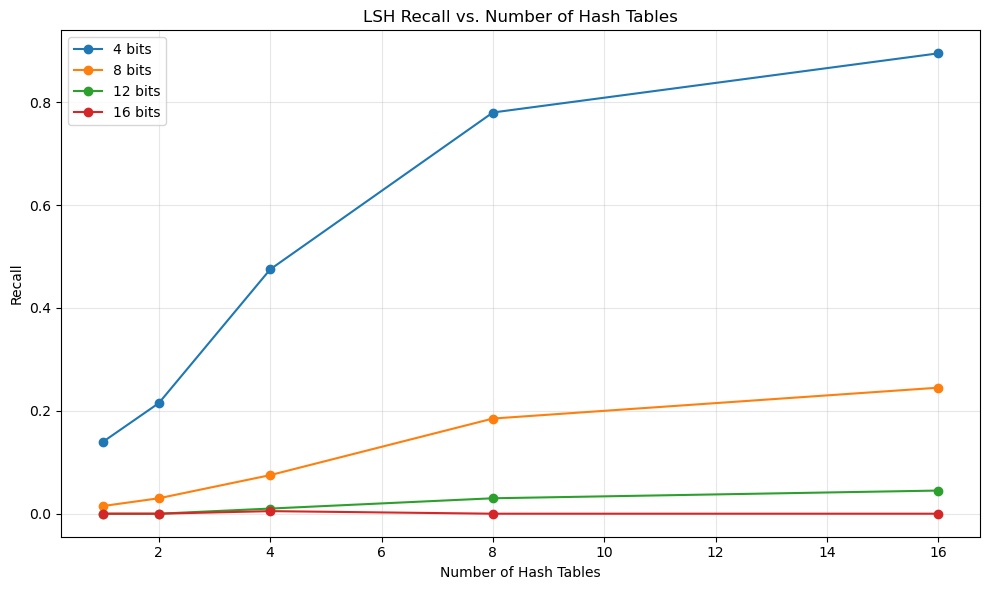

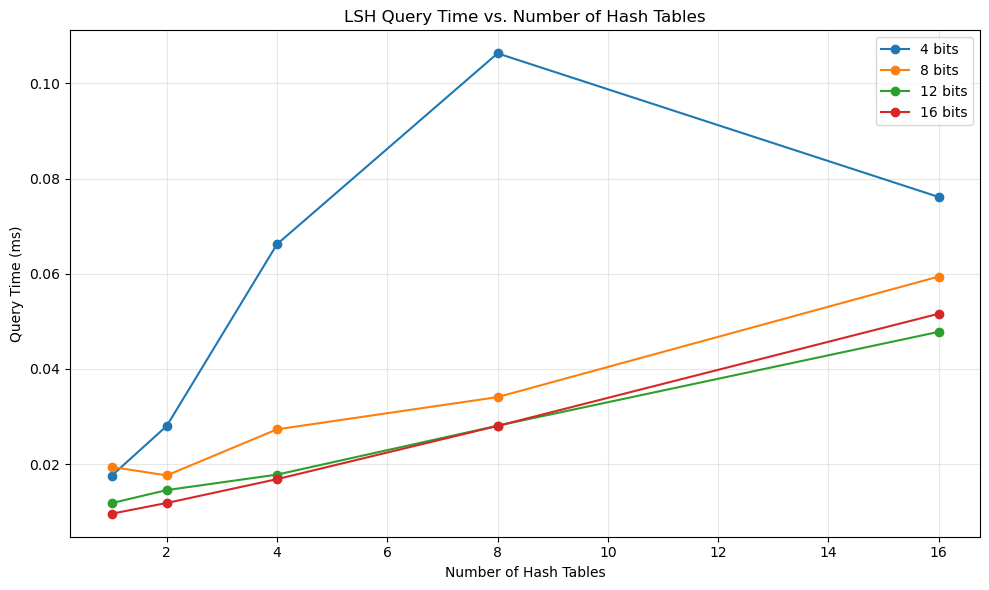

In [41]:
# Visualize recall results
plt.figure(figsize=(10, 6))
for i, num_bits in enumerate(bits_to_test):
    plt.plot(tables_to_test, recall_results[i], marker='o', label=f"{num_bits} bits")

plt.xlabel("Number of Hash Tables")
plt.ylabel("Recall")
plt.title("LSH Recall vs. Number of Hash Tables")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize query time
plt.figure(figsize=(10, 6))
for i, num_bits in enumerate(bits_to_test):
    plt.plot(tables_to_test, query_times[i] * 1000, marker='o', label=f"{num_bits} bits")  # Convert to ms

plt.xlabel("Number of Hash Tables")
plt.ylabel("Query Time (ms)")
plt.title("LSH Query Time vs. Number of Hash Tables")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()